# Tutorial: TC risk and adaptation options in the Caribbean 

In [2]:
# Country List
#countryl = ["AIA","ATG","BHS","DMA","DOM","HTI","KNA","MSR","PRI","TCA","VGB" ] 
# source litpop: nfw AIA ATG BHS DMA KNA MSR PRI TCA VGB pc (produced capital) DOM HTI

## Exposure 

In [3]:
%matplotlib inline
import numpy as np
from climada.entity.exposures import LitPop

In [4]:
import os
from climada.util import save, load

abs_path = os.path.join(os.getcwd(), 'results/exp_atg.h5')
exp = load(abs_path)

In [5]:
## uncomment if you want to display the exposure 
#exp.plot_raster() 
#exp.plot_scatter()

# Hazard

In [6]:
abs_path = os.path.join(os.getcwd(), 'results/tc_atg.h5')
tc = load(abs_path)

In [7]:
## uncomment if you want to display the hazard
#tc.plot_rp_intensity()

# Impact 

In [8]:
abs_path = os.path.join(os.getcwd(), 'results/imp_atg.csv')
imp = load(abs_path)

In [9]:
## uncomment if you want to display the impact 
#imp.plot_hexbin_eai_exposure(buffer=1)

In [10]:
from climada.entity.impact_funcs.trop_cyclone import ImpfSetTropCyclone
from climada.entity import ImpactFuncSet
import matplotlib.pyplot as plt

# generate the default calibrated TC impact functions for different regions
imp_fun = ImpfSetTropCyclone()
imp_fun.set_calibrated_regional_ImpfSet()

{'NA1': 66.3,
 'NA2': 89.2,
 'NI': 70.8,
 'OC': 64.1,
 'SI': 52.4,
 'WP1': 66.4,
 'WP2': 188.4,
 'WP3': 112.8,
 'WP4': 190.5,
 'ROW': 110.1}

# Damages 2030 (1.4°C)

In [11]:
import copy
tc_fut = copy.deepcopy(tc)
tc_fut.intensity.data += 0.3 # 0.3% increase in intensity

In [12]:
# present exposure - 2020 and future exposure - 2030
exp_20 = copy.deepcopy(exp)
exp_20.ref_year = 2020
exp_20.gdf.value = exp_20.gdf.value*1.02**(2020-2014) # Litpop 2014 values * 2% annual growth rate

exp_30 = copy.deepcopy(exp)
exp_30.ref_year = 2030
exp_30.gdf.value = exp_30.gdf.value*1.02**(2030-2014) # Litpop 2014 values * 2% annual growth rate

In [13]:
tc.centroids.set_dist_coast()
tc.centroids.dist_coast < 1000 # centroids less than 1km to the coast 
num_cen_coast = np.argwhere(tc.centroids.dist_coast < 1000).size

2021-10-08 14:32:38,854 - climada.hazard.centroids.centr - INFO - Convert centroids to GeoSeries of Point shapes.


/Applications/anaconda3/envs/climada_env/lib/python3.8/site-packages/pyproj/crs/crs.py:53: FutureWarning: '+init=<authority>:<code>' syntax is deprecated. '<authority>:<code>' is the preferred initialization method. When making the change, be mindful of axis order changes: https://pyproj4.github.io/pyproj/stable/gotchas.html#axis-order-changes-in-proj-6
  return _prepare_from_string(" ".join(pjargs))


2021-10-08 14:32:39,511 - climada.util.coordinates - INFO - dist_to_coast: UTM 32620 (1/1)


/Applications/anaconda3/envs/climada_env/lib/python3.8/site-packages/pyproj/crs/crs.py:53: FutureWarning: '+init=<authority>:<code>' syntax is deprecated. '<authority>:<code>' is the preferred initialization method. When making the change, be mindful of axis order changes: https://pyproj4.github.io/pyproj/stable/gotchas.html#axis-order-changes-in-proj-6
  return _prepare_from_string(" ".join(pjargs))
/Applications/anaconda3/envs/climada_env/lib/python3.8/site-packages/pyproj/crs/crs.py:53: FutureWarning: '+init=<authority>:<code>' syntax is deprecated. '<authority>:<code>' is the preferred initialization method. When making the change, be mindful of axis order changes: https://pyproj4.github.io/pyproj/stable/gotchas.html#axis-order-changes-in-proj-6
  return _prepare_from_string(" ".join(pjargs))


In [16]:
#exp.gdf['region_id'] = range(0,548)  
tc.centroids.set_dist_coast()
tc.centroids.dist_coast < 1000 # centroids less than 1km to the coast 
num_cen_coast = np.argwhere(tc.centroids.dist_coast < 1000).size

# 36% of coastal assets 

x_list = list(range(0,num_cen_coast))
m = 0

for x in range(0,548): 
    if tc.centroids.dist_coast[x] < 1000: 
        exp_30.gdf['region_id'][x] = 1
        x_list[m] = x
        m = m +1
    else: 
        exp_30.gdf['region_id'][x] = 0

exp_20.gdf['region_id'] = exp_30.gdf['region_id']

from random import sample
l_36 = sample(x_list,k=81)

exp_20.gdf['region_id'][l_36] = 2
exp_30.gdf['region_id'][l_36] = 2

2021-10-08 14:34:01,768 - climada.util.coordinates - INFO - dist_to_coast: UTM 32620 (1/1)


/Applications/anaconda3/envs/climada_env/lib/python3.8/site-packages/pyproj/crs/crs.py:53: FutureWarning: '+init=<authority>:<code>' syntax is deprecated. '<authority>:<code>' is the preferred initialization method. When making the change, be mindful of axis order changes: https://pyproj4.github.io/pyproj/stable/gotchas.html#axis-order-changes-in-proj-6
  return _prepare_from_string(" ".join(pjargs))
/Applications/anaconda3/envs/climada_env/lib/python3.8/site-packages/pyproj/crs/crs.py:53: FutureWarning: '+init=<authority>:<code>' syntax is deprecated. '<authority>:<code>' is the preferred initialization method. When making the change, be mindful of axis order changes: https://pyproj4.github.io/pyproj/stable/gotchas.html#axis-order-changes-in-proj-6
  return _prepare_from_string(" ".join(pjargs))


In [17]:
l_x24 = []
  
for i in x_list:
    if i not in l_36:
        l_x24.append(i)

In [18]:
l_24 = sample(l_x24,k=46)

exp_20.gdf['region_id'][l_24] = 3
exp_30.gdf['region_id'][l_24] = 3

In [19]:
l_x10 = []
  
for i in x_list:
    if i not in l_24:
        l_x10.append(i)

In [20]:
l_10 = sample(l_x10,k=19)

exp_20.gdf['region_id'][l_10] = 4
exp_30.gdf['region_id'][l_10] = 4

In [21]:
l_x001 = []
  
for i in x_list:
    if i not in l_10:
        l_x001.append(i)

In [22]:
l_001 = sample(l_x001,k=1)

exp_20.gdf['region_id'][l_001] = 5
exp_30.gdf['region_id'][l_001] = 5

In [23]:
%matplotlib inline
from climada.entity import Entity
from climada.entity.exposures import LitPop

ent_20 = Entity()
ent_20.exposures = exp_20
ent_30 = Entity()
ent_30.exposures = exp_30

2021-10-08 14:34:08,739 - climada.entity.exposures.base - INFO - meta set to default value {}
2021-10-08 14:34:08,740 - climada.entity.exposures.base - INFO - tag set to default value  File: 
 Description: 
2021-10-08 14:34:08,741 - climada.entity.exposures.base - INFO - ref_year set to default value 2018
2021-10-08 14:34:08,742 - climada.entity.exposures.base - INFO - value_unit set to default value USD
2021-10-08 14:34:08,743 - climada.entity.exposures.base - INFO - crs set to default value: EPSG:4326
2021-10-08 14:34:08,759 - climada.entity.exposures.base - INFO - meta set to default value {}
2021-10-08 14:34:08,759 - climada.entity.exposures.base - INFO - tag set to default value  File: 
 Description: 
2021-10-08 14:34:08,760 - climada.entity.exposures.base - INFO - ref_year set to default value 2018
2021-10-08 14:34:08,760 - climada.entity.exposures.base - INFO - value_unit set to default value USD
2021-10-08 14:34:08,761 - climada.entity.exposures.base - INFO - crs set to default

/Users/tmb/Documents/CLIMADA/climada_python-2.1.1/climada/entity/exposures/base.py:219: FutureWarning: Assigning CRS to a GeoDataFrame without a geometry column is now deprecated and will not be supported in the future.
  self.gdf.crs = self.meta['crs']


In [24]:
ent_20.impact_funcs = imp_fun
ent_30.impact_funcs = imp_fun

In [25]:
from climada.entity import Measure, MeasureSet

meas_0 = Measure()
meas_0.name = 'Current Adaptation'
meas_0.haz_type = 'TC'
meas_0.cost = 1

meas_set = MeasureSet()
meas_set.append(meas_0)
meas_set.check()

ent_20.measures = meas_set
ent_30.measures = meas_set

2021-10-08 14:34:12,664 - climada.util.checker - ERROR - Invalid Measure.color_rgb size: 3 != 4.


In [26]:
ent_20.exposures.ref_year = 2020
ent_30.exposures.ref_year = 2030

In [27]:
# define discount rates
import numpy as np
from climada.entity import DiscRates

disc_rate = DiscRates()
disc_rate.years = np.arange(2000, 2101)
disc_rate.rates = np.zeros(disc_rate.years.size) # 0%

ent_20.disc_rates = disc_rate
ent_30.disc_rates = disc_rate

2021-10-08 14:34:14,946 - climada.entity.exposures.base - INFO - Matching 548 exposures with 548 centroids.
2021-10-08 14:34:14,950 - climada.engine.impact - INFO - Calculating damage for 542 assets (>0) and 3906 events.
2021-10-08 14:34:14,951 - climada.engine.impact - INFO - Missing exposures impact functions for hazard if_TC. Using impact functions in if_.
2021-10-08 14:34:14,963 - climada.engine.impact - INFO - Exposures matching centroids found in centr_TC
2021-10-08 14:34:14,964 - climada.engine.impact - INFO - Calculating damage for 542 assets (>0) and 3906 events.
2021-10-08 14:34:14,965 - climada.engine.impact - INFO - Missing exposures impact functions for hazard if_TC. Using impact functions in if_.
2021-10-08 14:34:14,977 - climada.entity.exposures.base - INFO - Matching 548 exposures with 548 centroids.
2021-10-08 14:34:14,980 - climada.engine.impact - INFO - Calculating damage for 542 assets (>0) and 3906 events.
2021-10-08 14:34:14,980 - climada.engine.impact - INFO - Mi

<AxesSubplot:title={'center':'Risk at 2020 and 2030'}, ylabel='Impact (USD m)'>

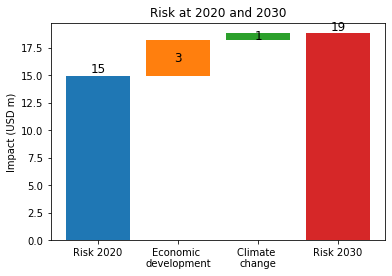

In [28]:
from climada.engine import CostBenefit,risk_aai_agg

cost_ben = CostBenefit()
cost_ben.calc(tc, ent_20, tc_fut, ent_30) # prints costs and benefits
cost_ben.plot_waterfall(tc, ent_20, tc_fut, ent_30, risk_func=risk_aai_agg)

In [29]:
import matplotlib.colors as colors

In [30]:
# Adaptation options

meas_set = MeasureSet()

meas_1 = Measure()
meas_1.name = 'Retrofitting'
meas_1.haz_type = 'TC'
meas_1.color_rgb = colors.to_rgb('deepskyblue')
meas_1.cost = 0.1*sum(exp_20.gdf.value) # 10% of housing value
meas_1.hazard_freq_cutoff = 1/100

meas_set.append(meas_1)
meas_set.check()

meas_2 = Measure()
meas_2.name = 'Seawalls'
meas_2.haz_type = 'TC'
meas_2.color_rgb = colors.to_rgb('orange')
meas_2.cost = 0.1*152*49000000
meas_2.hazard_freq_cutoff = 1/100
meas_2.exp_region_id = [4]

meas_set.append(meas_2)
meas_set.check()

meas_3 = Measure()
meas_3.name = 'Mangroves'
meas_3.haz_type = 'TC'
meas_3.color_rgb = colors.to_rgb('brown')
meas_3.cost = 152*0.1*200000 # 10% of coast with mangroves
meas_3.exp_region_id = [4]
meas_3.mdd_impact = (0.75, 0)
meas_3.hazard_inten_imp = (1,-20)

meas_set.append(meas_3)
meas_set.check()

meas_4 = Measure()
meas_4.name = 'Coral'
meas_4.haz_type = 'TC'
meas_4.color_rgb = colors.to_rgb('green')
meas_4.cost = 0.43*152*4000000 # 36% of coastline
meas_4.mdd_impact = (0.5, 0)
meas_4.exp_region_id = [2]


meas_set.append(meas_4)
meas_set.check()

meas_5 = Measure()
meas_5.name = 'Levees'
meas_5.haz_type = 'TC'
meas_5.color_rgb = colors.to_rgb('red')
meas_5.cost = 0.1*152*49000000 # 10% of coastline 
meas_5.hazard_freq_cutoff = 1/50
meas_5.exp_region_id = [4]

meas_set.append(meas_5)
meas_set.check()


In [31]:
meas_6 = Measure()
meas_6.haz_type = 'TC'
meas_6.name = 'risk_transfer'
meas_6.color_rgb = colors.to_rgb('royalblue')


meas_6.risk_transf_attach = imp.calc_freq_curve(12).impact
meas_6.risk_transf_cover = imp.calc_freq_curve(50).impact
meas_6.risk_transf_cost_factor = 1.5
# cost: only structuring and transaction costs, expected loss will be added to come to total cost of risk transfer
meas_6.cost = 100000 + 0.02*meas_6.risk_transf_cover

meas_set.append(meas_6)
meas_set.check()

ent_20.measures = meas_set
ent_30.measures = meas_set

2021-10-08 14:34:36,722 - climada.engine.impact - INFO - Exposures matching centroids found in centr_TC
2021-10-08 14:34:36,726 - climada.engine.impact - INFO - Calculating damage for 542 assets (>0) and 3906 events.
2021-10-08 14:34:36,727 - climada.engine.impact - INFO - Missing exposures impact functions for hazard if_TC. Using impact functions in if_.
2021-10-08 14:34:36,737 - climada.engine.impact - INFO - Exposures matching centroids found in centr_TC
2021-10-08 14:34:36,738 - climada.engine.impact - INFO - Calculating damage for 542 assets (>0) and 3906 events.
2021-10-08 14:34:36,739 - climada.engine.impact - INFO - Missing exposures impact functions for hazard if_TC. Using impact functions in if_.
2021-10-08 14:34:36,760 - climada.engine.impact - INFO - Exposures matching centroids found in centr_TC
2021-10-08 14:34:36,763 - climada.engine.impact - INFO - Calculating damage for 542 assets (>0) and 3906 events.
2021-10-08 14:34:36,764 - climada.engine.impact - INFO - Missing ex

/Users/tmb/Documents/CLIMADA/climada_python-2.1.1/climada/entity/exposures/base.py:188: FutureWarning: Assigning CRS to a GeoDataFrame without a geometry column is now deprecated and will not be supported in the future.
  self.gdf = GeoDataFrame(*args, **kwargs)
/Users/tmb/Documents/CLIMADA/climada_python-2.1.1/climada/entity/exposures/base.py:188: FutureWarning: Assigning CRS to a GeoDataFrame without a geometry column is now deprecated and will not be supported in the future.
  self.gdf = GeoDataFrame(*args, **kwargs)
/Users/tmb/Documents/CLIMADA/climada_python-2.1.1/climada/entity/measures/base.py:357: FutureWarning: Assigning CRS to a GeoDataFrame without a geometry column is now deprecated and will not be supported in the future.
  new_exp.gdf = GeoDataFrame(
/Users/tmb/Documents/CLIMADA/climada_python-2.1.1/climada/entity/exposures/base.py:188: FutureWarning: Assigning CRS to a GeoDataFrame without a geometry column is now deprecated and will not be supported in the future.
  sel

2021-10-08 14:34:36,998 - climada.entity.exposures.base - INFO - meta set to default value {}
2021-10-08 14:34:36,998 - climada.entity.exposures.base - INFO - tag set to default value  File: 
 Description: 
2021-10-08 14:34:36,999 - climada.entity.exposures.base - INFO - ref_year set to default value 2018
2021-10-08 14:34:36,999 - climada.entity.exposures.base - INFO - value_unit set to default value USD
2021-10-08 14:34:37,000 - climada.engine.impact - INFO - Exposures matching centroids found in centr_TC
2021-10-08 14:34:37,002 - climada.engine.impact - INFO - Calculating damage for 18 assets (>0) and 3906 events.
2021-10-08 14:34:37,003 - climada.engine.impact - INFO - Missing exposures impact functions for hazard if_TC. Using impact functions in if_.
2021-10-08 14:34:37,138 - climada.engine.impact - INFO - Exposures matching centroids found in centr_TC
2021-10-08 14:34:37,140 - climada.engine.impact - INFO - Calculating damage for 542 assets (>0) and 3906 events.
2021-10-08 14:34:3

/Users/tmb/Documents/CLIMADA/climada_python-2.1.1/climada/entity/exposures/base.py:188: FutureWarning: Assigning CRS to a GeoDataFrame without a geometry column is now deprecated and will not be supported in the future.
  self.gdf = GeoDataFrame(*args, **kwargs)
/Users/tmb/Documents/CLIMADA/climada_python-2.1.1/climada/entity/exposures/base.py:188: FutureWarning: Assigning CRS to a GeoDataFrame without a geometry column is now deprecated and will not be supported in the future.
  self.gdf = GeoDataFrame(*args, **kwargs)
/Users/tmb/Documents/CLIMADA/climada_python-2.1.1/climada/entity/measures/base.py:357: FutureWarning: Assigning CRS to a GeoDataFrame without a geometry column is now deprecated and will not be supported in the future.
  new_exp.gdf = GeoDataFrame(


2021-10-08 14:34:37,201 - climada.engine.impact - INFO - Calculating damage for 542 assets (>0) and 3906 events.
2021-10-08 14:34:37,201 - climada.engine.impact - INFO - Missing exposures impact functions for hazard if_TC. Using impact functions in if_.
2021-10-08 14:34:37,211 - climada.entity.exposures.base - INFO - meta set to default value {}
2021-10-08 14:34:37,211 - climada.entity.exposures.base - INFO - tag set to default value  File: 
 Description: 
2021-10-08 14:34:37,212 - climada.entity.exposures.base - INFO - ref_year set to default value 2018
2021-10-08 14:34:37,212 - climada.entity.exposures.base - INFO - value_unit set to default value USD
2021-10-08 14:34:37,213 - climada.engine.impact - INFO - Exposures matching centroids found in centr_TC
2021-10-08 14:34:37,214 - climada.engine.impact - INFO - Calculating damage for 18 assets (>0) and 3906 events.
2021-10-08 14:34:37,215 - climada.engine.impact - INFO - Missing exposures impact functions for hazard if_TC. Using impact

/Users/tmb/Documents/CLIMADA/climada_python-2.1.1/climada/entity/exposures/base.py:188: FutureWarning: Assigning CRS to a GeoDataFrame without a geometry column is now deprecated and will not be supported in the future.
  self.gdf = GeoDataFrame(*args, **kwargs)
/Users/tmb/Documents/CLIMADA/climada_python-2.1.1/climada/entity/exposures/base.py:188: FutureWarning: Assigning CRS to a GeoDataFrame without a geometry column is now deprecated and will not be supported in the future.
  self.gdf = GeoDataFrame(*args, **kwargs)
/Users/tmb/Documents/CLIMADA/climada_python-2.1.1/climada/entity/measures/base.py:357: FutureWarning: Assigning CRS to a GeoDataFrame without a geometry column is now deprecated and will not be supported in the future.
  new_exp.gdf = GeoDataFrame(
/Users/tmb/Documents/CLIMADA/climada_python-2.1.1/climada/entity/exposures/base.py:188: FutureWarning: Assigning CRS to a GeoDataFrame without a geometry column is now deprecated and will not be supported in the future.
  sel

2021-10-08 14:34:37,534 - climada.engine.impact - INFO - Exposures matching centroids found in centr_TC
2021-10-08 14:34:37,535 - climada.engine.impact - INFO - Calculating damage for 542 assets (>0) and 3906 events.
2021-10-08 14:34:37,536 - climada.engine.impact - INFO - Missing exposures impact functions for hazard if_TC. Using impact functions in if_.
2021-10-08 14:34:37,548 - climada.engine.impact - INFO - Exposures matching centroids found in centr_TC
2021-10-08 14:34:37,549 - climada.engine.impact - INFO - Calculating damage for 542 assets (>0) and 3906 events.
2021-10-08 14:34:37,550 - climada.engine.impact - INFO - Missing exposures impact functions for hazard if_TC. Using impact functions in if_.
2021-10-08 14:34:37,564 - climada.engine.cost_benefit - INFO - Computing cost benefit from years 2020 to 2030.

Measure          Cost (USD m)    Benefit (USD m)    Benefit/Cost
-------------  --------------  -----------------  --------------
Retrofitting          138.999          128

/Users/tmb/Documents/CLIMADA/climada_python-2.1.1/climada/entity/exposures/base.py:188: FutureWarning: Assigning CRS to a GeoDataFrame without a geometry column is now deprecated and will not be supported in the future.
  self.gdf = GeoDataFrame(*args, **kwargs)
/Users/tmb/Documents/CLIMADA/climada_python-2.1.1/climada/entity/measures/base.py:357: FutureWarning: Assigning CRS to a GeoDataFrame without a geometry column is now deprecated and will not be supported in the future.
  new_exp.gdf = GeoDataFrame(


<AxesSubplot:xlabel='Return Period (2030)', ylabel='Impact (USD)'>

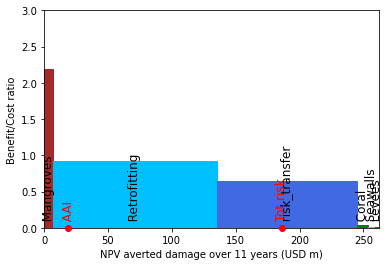

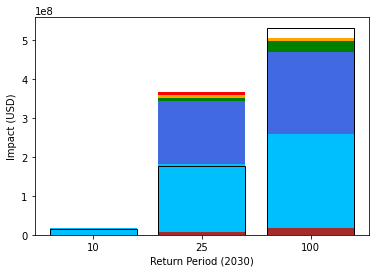

In [32]:
cost_ben = CostBenefit()
cost_ben.calc(tc, ent_20, tc_fut, ent_30) 

cost_ben.plot_cost_benefit() # plot benefit/cost ratio per measure
cost_ben.plot_event_view([10, 25, 100])

# Damages 2100 - 3°C 

In [42]:
tc_fut = copy.deepcopy(tc)
tc_fut.intensity.data += 1.9

In [43]:
exp_10 = copy.deepcopy(exp_30)
exp_10.ref_year = 2100
exp_10.gdf.value = exp_10.gdf.value*1.02**(2100-2014) # Litpop 2014values * 2% annual growth rate

In [44]:
ent_10 = Entity()
ent_10.exposures = exp_10
ent_10.impact_funcs = imp_fun
ent_10.measures = meas_set
ent_10.exposures.ref_year = 2100
ent_10.disc_rates = disc_rate

2021-10-08 09:41:08,329 - climada.entity.exposures.base - INFO - meta set to default value {}
2021-10-08 09:41:08,330 - climada.entity.exposures.base - INFO - tag set to default value  File: 
 Description: 
2021-10-08 09:41:08,331 - climada.entity.exposures.base - INFO - ref_year set to default value 2018
2021-10-08 09:41:08,332 - climada.entity.exposures.base - INFO - value_unit set to default value USD
2021-10-08 09:41:08,334 - climada.entity.exposures.base - INFO - crs set to default value: EPSG:4326


/Users/tmb/Documents/CLIMADA/climada_python-2.1.1/climada/entity/exposures/base.py:219: FutureWarning: Assigning CRS to a GeoDataFrame without a geometry column is now deprecated and will not be supported in the future.
  self.gdf.crs = self.meta['crs']


In [49]:
# Adaptation options

meas_set = MeasureSet()

meas_1 = Measure()
meas_1.name = 'Retrofitting'
meas_1.haz_type = 'TC'
meas_1.color_rgb = colors.to_rgb('deepskyblue')
meas_1.cost = 0.1*sum(exp_10.gdf.value)*3 # 10% of housing value
meas_1.hazard_freq_cutoff = 1/100
#meas_1.exp_region_id = [1]

meas_set.append(meas_1)
meas_set.check()

meas_2 = Measure()
meas_2.name = 'Seawalls'
meas_2.haz_type = 'TC'
meas_2.color_rgb = colors.to_rgb('orange')
meas_2.cost = 0.1*152*49000000+81*1000
meas_2.hazard_freq_cutoff = 1/100
meas_2.exp_region_id = [4]

meas_set.append(meas_2)
meas_set.check()

meas_3 = Measure()
meas_3.name = 'Mangroves'
meas_3.haz_type = 'TC'
meas_3.color_rgb = colors.to_rgb('brown')
meas_3.cost = 152*0.1*200000*4 # 10% of coast with mangroves
meas_3.exp_region_id = [4]
meas_3.mdd_impact = (0.75, 0)
meas_3.hazard_inten_imp = (1,-20)

meas_set.append(meas_3)
meas_set.check()

meas_4 = Measure()
meas_4.name = 'Coral'
meas_4.haz_type = 'TC'
meas_4.color_rgb = colors.to_rgb('green')
meas_4.cost = 0.01*152*4000000 # 1% of coastline
meas_4.paa_impact = (0.5, -0.001)
meas_4.exp_region_id = [5]

meas_set.append(meas_4)
meas_set.check()

meas_5 = Measure()
meas_5.name = 'Levees'
meas_5.haz_type = 'TC'
meas_5.color_rgb = colors.to_rgb('red')
meas_5.cost = 0.1*152*49000000+81*500 # 10% of coastline 
meas_5.hazard_freq_cutoff = 1/50
meas_5.exp_region_id = [4]

meas_set.append(meas_5)
meas_set.check()

meas_6 = Measure()
meas_6.haz_type = 'TC'
meas_6.name = 'risk_transfer'
meas_6.color_rgb = colors.to_rgb('royalblue')


meas_6.risk_transf_attach = imp.calc_freq_curve(12).impact
meas_6.risk_transf_cover = imp.calc_freq_curve(50).impact
meas_6.risk_transf_cost_factor = 1.5
# cost: only structuring and transaction costs, expected loss will be added to come to total cost of risk transfer
meas_6.cost = 100000 + 0.02*meas_6.risk_transf_cover

meas_set.append(meas_6)
meas_set.check()

ent_10.measures = meas_set

2021-10-08 09:42:19,121 - climada.engine.impact - INFO - Exposures matching centroids found in centr_TC
2021-10-08 09:42:19,124 - climada.engine.impact - INFO - Calculating damage for 542 assets (>0) and 3906 events.
2021-10-08 09:42:19,125 - climada.engine.impact - INFO - Missing exposures impact functions for hazard if_TC. Using impact functions in if_.
2021-10-08 09:42:19,136 - climada.engine.impact - INFO - Exposures matching centroids found in centr_TC
2021-10-08 09:42:19,137 - climada.engine.impact - INFO - Calculating damage for 542 assets (>0) and 3906 events.
2021-10-08 09:42:19,138 - climada.engine.impact - INFO - Missing exposures impact functions for hazard if_TC. Using impact functions in if_.
2021-10-08 09:42:19,160 - climada.engine.impact - INFO - Exposures matching centroids found in centr_TC
2021-10-08 09:42:19,162 - climada.engine.impact - INFO - Calculating damage for 542 assets (>0) and 3906 events.
2021-10-08 09:42:19,162 - climada.engine.impact - INFO - Missing ex

/Users/tmb/Documents/CLIMADA/climada_python-2.1.1/climada/entity/exposures/base.py:188: FutureWarning: Assigning CRS to a GeoDataFrame without a geometry column is now deprecated and will not be supported in the future.
  self.gdf = GeoDataFrame(*args, **kwargs)
/Users/tmb/Documents/CLIMADA/climada_python-2.1.1/climada/entity/exposures/base.py:188: FutureWarning: Assigning CRS to a GeoDataFrame without a geometry column is now deprecated and will not be supported in the future.
  self.gdf = GeoDataFrame(*args, **kwargs)
/Users/tmb/Documents/CLIMADA/climada_python-2.1.1/climada/entity/measures/base.py:357: FutureWarning: Assigning CRS to a GeoDataFrame without a geometry column is now deprecated and will not be supported in the future.
  new_exp.gdf = GeoDataFrame(
/Users/tmb/Documents/CLIMADA/climada_python-2.1.1/climada/entity/exposures/base.py:188: FutureWarning: Assigning CRS to a GeoDataFrame without a geometry column is now deprecated and will not be supported in the future.
  sel

2021-10-08 09:42:19,385 - climada.entity.exposures.base - INFO - meta set to default value {}
2021-10-08 09:42:19,386 - climada.entity.exposures.base - INFO - tag set to default value  File: 
 Description: 
2021-10-08 09:42:19,387 - climada.entity.exposures.base - INFO - ref_year set to default value 2018
2021-10-08 09:42:19,387 - climada.entity.exposures.base - INFO - value_unit set to default value USD
2021-10-08 09:42:19,389 - climada.engine.impact - INFO - Exposures matching centroids found in centr_TC
2021-10-08 09:42:19,392 - climada.engine.impact - INFO - Calculating damage for 19 assets (>0) and 3906 events.
2021-10-08 09:42:19,394 - climada.engine.impact - INFO - Missing exposures impact functions for hazard if_TC. Using impact functions in if_.
2021-10-08 09:42:19,530 - climada.engine.impact - INFO - Exposures matching centroids found in centr_TC
2021-10-08 09:42:19,531 - climada.engine.impact - INFO - Calculating damage for 542 assets (>0) and 3906 events.
2021-10-08 09:42:1

/Users/tmb/Documents/CLIMADA/climada_python-2.1.1/climada/entity/exposures/base.py:188: FutureWarning: Assigning CRS to a GeoDataFrame without a geometry column is now deprecated and will not be supported in the future.
  self.gdf = GeoDataFrame(*args, **kwargs)
/Users/tmb/Documents/CLIMADA/climada_python-2.1.1/climada/entity/exposures/base.py:188: FutureWarning: Assigning CRS to a GeoDataFrame without a geometry column is now deprecated and will not be supported in the future.
  self.gdf = GeoDataFrame(*args, **kwargs)
/Users/tmb/Documents/CLIMADA/climada_python-2.1.1/climada/entity/measures/base.py:357: FutureWarning: Assigning CRS to a GeoDataFrame without a geometry column is now deprecated and will not be supported in the future.
  new_exp.gdf = GeoDataFrame(


2021-10-08 09:42:19,595 - climada.entity.exposures.base - INFO - meta set to default value {}
2021-10-08 09:42:19,596 - climada.entity.exposures.base - INFO - tag set to default value  File: 
 Description: 
2021-10-08 09:42:19,597 - climada.entity.exposures.base - INFO - ref_year set to default value 2018
2021-10-08 09:42:19,597 - climada.entity.exposures.base - INFO - value_unit set to default value USD
2021-10-08 09:42:19,598 - climada.engine.impact - INFO - Exposures matching centroids found in centr_TC
2021-10-08 09:42:19,599 - climada.engine.impact - INFO - Calculating damage for 19 assets (>0) and 3906 events.
2021-10-08 09:42:19,600 - climada.engine.impact - INFO - Missing exposures impact functions for hazard if_TC. Using impact functions in if_.
2021-10-08 09:42:19,730 - climada.engine.impact - INFO - Exposures matching centroids found in centr_TC
2021-10-08 09:42:19,732 - climada.engine.impact - INFO - Calculating damage for 542 assets (>0) and 3906 events.
2021-10-08 09:42:1

/Users/tmb/Documents/CLIMADA/climada_python-2.1.1/climada/entity/exposures/base.py:188: FutureWarning: Assigning CRS to a GeoDataFrame without a geometry column is now deprecated and will not be supported in the future.
  self.gdf = GeoDataFrame(*args, **kwargs)
/Users/tmb/Documents/CLIMADA/climada_python-2.1.1/climada/entity/exposures/base.py:188: FutureWarning: Assigning CRS to a GeoDataFrame without a geometry column is now deprecated and will not be supported in the future.
  self.gdf = GeoDataFrame(*args, **kwargs)
/Users/tmb/Documents/CLIMADA/climada_python-2.1.1/climada/entity/measures/base.py:357: FutureWarning: Assigning CRS to a GeoDataFrame without a geometry column is now deprecated and will not be supported in the future.
  new_exp.gdf = GeoDataFrame(
/Users/tmb/Documents/CLIMADA/climada_python-2.1.1/climada/entity/exposures/base.py:188: FutureWarning: Assigning CRS to a GeoDataFrame without a geometry column is now deprecated and will not be supported in the future.
  sel

2021-10-08 09:42:19,925 - climada.engine.impact - INFO - Exposures matching centroids found in centr_TC
2021-10-08 09:42:19,927 - climada.engine.impact - INFO - Calculating damage for 542 assets (>0) and 3906 events.
2021-10-08 09:42:19,927 - climada.engine.impact - INFO - Missing exposures impact functions for hazard if_TC. Using impact functions in if_.
2021-10-08 09:42:19,939 - climada.engine.impact - INFO - Exposures matching centroids found in centr_TC
2021-10-08 09:42:19,940 - climada.engine.impact - INFO - Calculating damage for 542 assets (>0) and 3906 events.
2021-10-08 09:42:19,941 - climada.engine.impact - INFO - Missing exposures impact functions for hazard if_TC. Using impact functions in if_.
2021-10-08 09:42:19,954 - climada.engine.cost_benefit - INFO - Computing cost benefit from years 2020 to 2100.

Measure          Cost (USD bn)    Benefit (USD bn)    Benefit/Cost
-------------  ---------------  ------------------  --------------
Retrofitting          2.79093         

/Users/tmb/Documents/CLIMADA/climada_python-2.1.1/climada/entity/exposures/base.py:188: FutureWarning: Assigning CRS to a GeoDataFrame without a geometry column is now deprecated and will not be supported in the future.
  self.gdf = GeoDataFrame(*args, **kwargs)
/Users/tmb/Documents/CLIMADA/climada_python-2.1.1/climada/entity/measures/base.py:357: FutureWarning: Assigning CRS to a GeoDataFrame without a geometry column is now deprecated and will not be supported in the future.
  new_exp.gdf = GeoDataFrame(


<AxesSubplot:xlabel='Return Period (2100)', ylabel='Impact (USD)'>

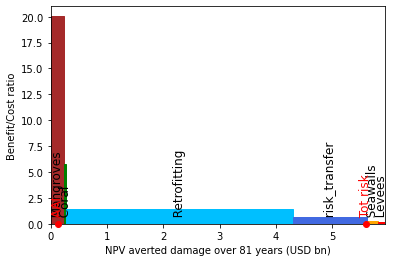

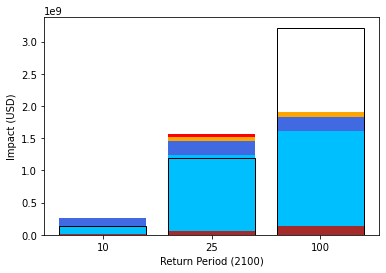

In [50]:
cost_ben = CostBenefit()
cost_ben.calc(tc, ent_20, tc_fut, ent_10) 

cost_ben.plot_cost_benefit() # plot benefit/cost ratio per measure
cost_ben.plot_event_view([10, 25, 100])

# Damages 2100 - 1.5°C 

In [51]:
tc_fut = copy.deepcopy(tc)
tc_fut.intensity.data += 0.4

In [52]:
meas_4 = Measure()
meas_4.name = 'Coral'
meas_4.haz_type = 'TC'
meas_4.color_rgb = colors.to_rgb('green')
meas_4.cost = 0.24*152*4000000 # 24% of coastline
meas_4.paa_impact = (0.5, -0.20)
meas_4.exp_region_id = [3]

meas_set.append(meas_4)
meas_set.check()

In [53]:
ent_10.measures = meas_set

2021-10-08 09:42:56,471 - climada.engine.impact - INFO - Exposures matching centroids found in centr_TC
2021-10-08 09:42:56,474 - climada.engine.impact - INFO - Calculating damage for 542 assets (>0) and 3906 events.
2021-10-08 09:42:56,475 - climada.engine.impact - INFO - Missing exposures impact functions for hazard if_TC. Using impact functions in if_.
2021-10-08 09:42:56,486 - climada.engine.impact - INFO - Exposures matching centroids found in centr_TC
2021-10-08 09:42:56,487 - climada.engine.impact - INFO - Calculating damage for 542 assets (>0) and 3906 events.
2021-10-08 09:42:56,488 - climada.engine.impact - INFO - Missing exposures impact functions for hazard if_TC. Using impact functions in if_.
2021-10-08 09:42:56,509 - climada.engine.impact - INFO - Exposures matching centroids found in centr_TC
2021-10-08 09:42:56,511 - climada.engine.impact - INFO - Calculating damage for 542 assets (>0) and 3906 events.
2021-10-08 09:42:56,511 - climada.engine.impact - INFO - Missing ex

/Users/tmb/Documents/CLIMADA/climada_python-2.1.1/climada/entity/exposures/base.py:188: FutureWarning: Assigning CRS to a GeoDataFrame without a geometry column is now deprecated and will not be supported in the future.
  self.gdf = GeoDataFrame(*args, **kwargs)
/Users/tmb/Documents/CLIMADA/climada_python-2.1.1/climada/entity/exposures/base.py:188: FutureWarning: Assigning CRS to a GeoDataFrame without a geometry column is now deprecated and will not be supported in the future.
  self.gdf = GeoDataFrame(*args, **kwargs)
/Users/tmb/Documents/CLIMADA/climada_python-2.1.1/climada/entity/measures/base.py:357: FutureWarning: Assigning CRS to a GeoDataFrame without a geometry column is now deprecated and will not be supported in the future.
  new_exp.gdf = GeoDataFrame(
/Users/tmb/Documents/CLIMADA/climada_python-2.1.1/climada/entity/exposures/base.py:188: FutureWarning: Assigning CRS to a GeoDataFrame without a geometry column is now deprecated and will not be supported in the future.
  sel

2021-10-08 09:42:56,724 - climada.entity.exposures.base - INFO - ref_year set to default value 2018
2021-10-08 09:42:56,725 - climada.entity.exposures.base - INFO - value_unit set to default value USD
2021-10-08 09:42:56,727 - climada.engine.impact - INFO - Exposures matching centroids found in centr_TC
2021-10-08 09:42:56,729 - climada.engine.impact - INFO - Calculating damage for 19 assets (>0) and 3906 events.
2021-10-08 09:42:56,730 - climada.engine.impact - INFO - Missing exposures impact functions for hazard if_TC. Using impact functions in if_.
2021-10-08 09:42:56,867 - climada.engine.impact - INFO - Exposures matching centroids found in centr_TC
2021-10-08 09:42:56,869 - climada.engine.impact - INFO - Calculating damage for 542 assets (>0) and 3906 events.
2021-10-08 09:42:56,869 - climada.engine.impact - INFO - Missing exposures impact functions for hazard if_TC. Using impact functions in if_.
2021-10-08 09:42:56,880 - climada.engine.impact - INFO - Exposures matching centroid

/Users/tmb/Documents/CLIMADA/climada_python-2.1.1/climada/entity/exposures/base.py:188: FutureWarning: Assigning CRS to a GeoDataFrame without a geometry column is now deprecated and will not be supported in the future.
  self.gdf = GeoDataFrame(*args, **kwargs)
/Users/tmb/Documents/CLIMADA/climada_python-2.1.1/climada/entity/exposures/base.py:188: FutureWarning: Assigning CRS to a GeoDataFrame without a geometry column is now deprecated and will not be supported in the future.
  self.gdf = GeoDataFrame(*args, **kwargs)
/Users/tmb/Documents/CLIMADA/climada_python-2.1.1/climada/entity/measures/base.py:357: FutureWarning: Assigning CRS to a GeoDataFrame without a geometry column is now deprecated and will not be supported in the future.
  new_exp.gdf = GeoDataFrame(


2021-10-08 09:42:56,936 - climada.entity.exposures.base - INFO - meta set to default value {}
2021-10-08 09:42:56,937 - climada.entity.exposures.base - INFO - tag set to default value  File: 
 Description: 
2021-10-08 09:42:56,937 - climada.entity.exposures.base - INFO - ref_year set to default value 2018
2021-10-08 09:42:56,937 - climada.entity.exposures.base - INFO - value_unit set to default value USD
2021-10-08 09:42:56,938 - climada.engine.impact - INFO - Exposures matching centroids found in centr_TC
2021-10-08 09:42:56,939 - climada.engine.impact - INFO - Calculating damage for 19 assets (>0) and 3906 events.
2021-10-08 09:42:56,940 - climada.engine.impact - INFO - Missing exposures impact functions for hazard if_TC. Using impact functions in if_.
2021-10-08 09:42:57,064 - climada.engine.impact - INFO - Exposures matching centroids found in centr_TC
2021-10-08 09:42:57,066 - climada.engine.impact - INFO - Calculating damage for 542 assets (>0) and 3906 events.
2021-10-08 09:42:5

/Users/tmb/Documents/CLIMADA/climada_python-2.1.1/climada/entity/exposures/base.py:188: FutureWarning: Assigning CRS to a GeoDataFrame without a geometry column is now deprecated and will not be supported in the future.
  self.gdf = GeoDataFrame(*args, **kwargs)
/Users/tmb/Documents/CLIMADA/climada_python-2.1.1/climada/entity/exposures/base.py:188: FutureWarning: Assigning CRS to a GeoDataFrame without a geometry column is now deprecated and will not be supported in the future.
  self.gdf = GeoDataFrame(*args, **kwargs)
/Users/tmb/Documents/CLIMADA/climada_python-2.1.1/climada/entity/measures/base.py:357: FutureWarning: Assigning CRS to a GeoDataFrame without a geometry column is now deprecated and will not be supported in the future.
  new_exp.gdf = GeoDataFrame(
/Users/tmb/Documents/CLIMADA/climada_python-2.1.1/climada/entity/exposures/base.py:188: FutureWarning: Assigning CRS to a GeoDataFrame without a geometry column is now deprecated and will not be supported in the future.
  sel

2021-10-08 09:42:57,252 - climada.engine.impact - INFO - Exposures matching centroids found in centr_TC
2021-10-08 09:42:57,254 - climada.engine.impact - INFO - Calculating damage for 542 assets (>0) and 3906 events.
2021-10-08 09:42:57,254 - climada.engine.impact - INFO - Missing exposures impact functions for hazard if_TC. Using impact functions in if_.
2021-10-08 09:42:57,265 - climada.engine.impact - INFO - Exposures matching centroids found in centr_TC
2021-10-08 09:42:57,267 - climada.engine.impact - INFO - Calculating damage for 542 assets (>0) and 3906 events.
2021-10-08 09:42:57,267 - climada.engine.impact - INFO - Missing exposures impact functions for hazard if_TC. Using impact functions in if_.
2021-10-08 09:42:57,280 - climada.engine.cost_benefit - INFO - Computing cost benefit from years 2020 to 2100.

Measure          Cost (USD bn)    Benefit (USD bn)    Benefit/Cost
-------------  ---------------  ------------------  --------------
Retrofitting          2.79093         

<AxesSubplot:xlabel='Return Period (2100)', ylabel='Impact (USD)'>

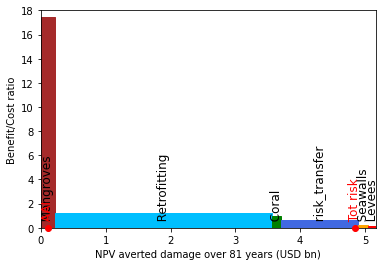

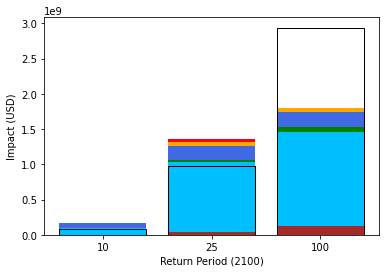

In [54]:
cost_ben = CostBenefit()
cost_ben.calc(tc, ent_20, tc_fut, ent_10) 

cost_ben.plot_cost_benefit() # plot benefit/cost ratio per measure
cost_ben.plot_event_view([10, 25, 100])